# WEATHER PREDICTION

## IMPORTING REQUIRED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATA FROM DATA SOURCE

In [2]:
df = pd.read_csv("pune.csv")
df

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2017-01-01 01:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,18.0,5.0,1,63,0.0,1014.0,18,10,82,2
1,2017-01-01 02:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,18.0,5.0,0,63,0.0,1014.0,18,10,94,3
2,2017-01-01 03:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,17.0,6.0,0,64,0.0,1014.0,17,10,105,3
3,2017-01-01 04:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,19.0,7.0,1,57,0.0,1014.0,19,10,110,4
4,2017-01-01 05:00:00,31.0,17.0,NaN,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,19.0,8.0,1,51,0.0,1015.0,19,10,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45498,2022-03-11 19:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,30.0,10.0,6,28,0.0,1009.0,30,10,235,7
45499,2022-03-11 20:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,29.0,14.0,7,29,0.0,1010.0,29,10,289,9
45500,2022-03-11 21:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,27.0,12.0,9,30,0.0,1012.0,27,10,343,12
45501,2022-03-11 22:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,26.0,14.0,8,31,0.0,1011.0,26,10,234,11


## DATA VISUALIZATION

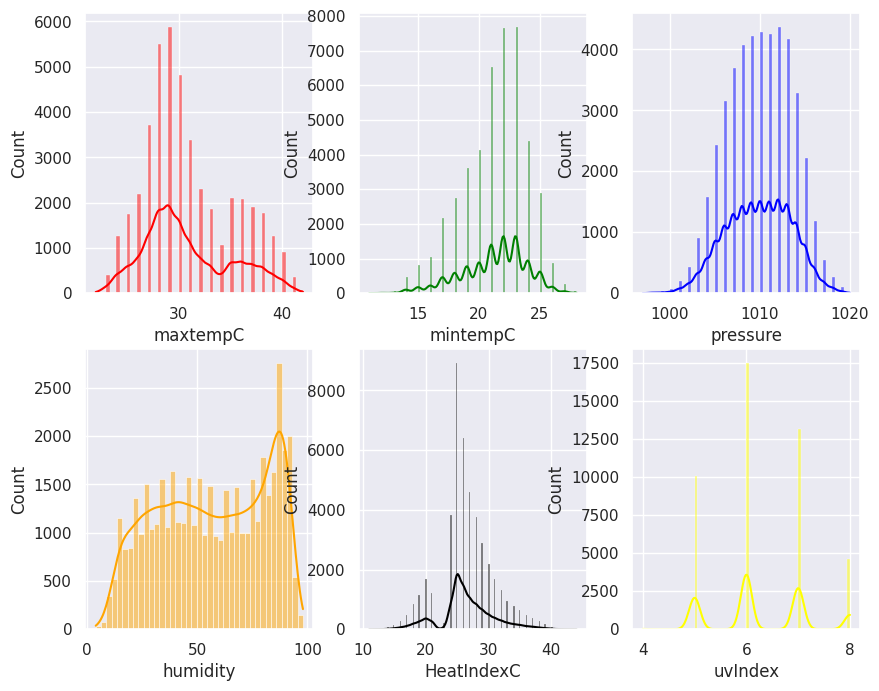

In [3]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,3,figsize=(10,8))
sns.histplot(data=df,x="maxtempC",kde=True,ax=axs[0,0],color='red')
sns.histplot(data=df,x="mintempC",kde=True,ax=axs[0,1],color='green')
sns.histplot(data=df,x="pressure",kde=True,ax=axs[0,2],color='blue')
sns.histplot(data=df,x="humidity",kde=True,ax=axs[1,0],color='orange')
sns.histplot(data=df,x="HeatIndexC",kde=True,ax=axs[1,1],color='black')
sns.histplot(data=df,x="uvIndex",kde=True,ax=axs[1,2],color='yellow')

plt.savefig('Histogram showing the distribution of numerical variables in the dataset')

## EXPLORATORY DATA ANALYSIS (EDA)

### - General Information 

In [4]:
df.shape

(45503, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45503 entries, 0 to 45502
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          45501 non-null  object 
 1   maxtempC           44633 non-null  float64
 2   mintempC           45478 non-null  float64
 3   sunHour            45351 non-null  float64
 4   uvIndex            45450 non-null  float64
 5   moon_illumination  45502 non-null  float64
 6   moonrise           45503 non-null  object 
 7   moonset            45503 non-null  object 
 8   sunrise            45503 non-null  object 
 9   sunset             45503 non-null  object 
 10  DewPointC          45500 non-null  float64
 11  FeelsLikeC         45503 non-null  int64  
 12  HeatIndexC         45503 non-null  int64  
 13  WindChillC         45478 non-null  float64
 14  WindGustKmph       45494 non-null  float64
 15  cloudcover         45503 non-null  int64  
 16  humidity           455

### - Statistical Information

In [6]:
df.describe()

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,44633.000000,45478.000000,45351.000000,45450.000000,45502.000000,45500.000000,45503.000000,45503.000000,45478.000000,45494.000000,45503.000000,45503.000000,45487.000000,45501.000000,45503.000000,45503.000000,45503.000000,45503.000000
mean,30.831201,21.249307,11.087453,6.266249,46.087557,43464.701736,26.322221,26.491462,25.437706,18.101552,31.633013,56.551348,0.246156,1009.847981,25.438543,9.629739,208.436389,10.298332
std,4.242974,2.667357,1.002336,0.924189,31.231273,13136.110646,4.384641,4.242005,4.562040,8.647081,33.945653,24.535400,0.883922,3.594591,4.562331,1.131830,87.580946,5.138205
min,22.000000,11.000000,8.300000,4.000000,0.000000,20714.000000,10.000000,11.000000,10.000000,1.000000,0.000000,4.000000,0.000000,997.000000,11.000000,2.000000,0.000000,0.000000
25%,28.000000,20.000000,10.500000,6.000000,19.000000,32088.750000,25.000000,25.000000,23.000000,12.000000,2.000000,36.000000,0.000000,1007.000000,23.000000,10.000000,113.000000,6.000000
50%,30.000000,22.000000,11.000000,6.000000,46.000000,43463.500000,26.000000,26.000000,25.000000,16.000000,13.000000,57.000000,0.000000,1010.000000,25.000000,10.000000,253.000000,9.000000
75%,34.000000,23.000000,11.800000,7.000000,73.000000,54841.250000,29.000000,29.000000,28.000000,23.000000,66.000000,80.000000,0.100000,1013.000000,28.000000,10.000000,273.000000,14.000000
max,42.000000,28.000000,13.500000,8.000000,100.000000,66216.000000,44.000000,44.000000,42.000000,76.000000,100.000000,98.000000,25.700000,1020.000000,42.000000,10.000000,360.000000,40.000000


## DATA PREPROCESSING

### - Deleting Unnecessary Attributes

In [7]:
df.drop(['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset'], axis = 1, inplace = True)

### - Finding The Missing Data (NaN Values)

In [8]:
df.isna().sum()

maxtempC             870
mintempC              25
sunHour              152
uvIndex               53
moon_illumination      1
DewPointC              3
FeelsLikeC             0
HeatIndexC             0
WindChillC            25
WindGustKmph           9
cloudcover             0
humidity               0
precipMM              16
pressure               2
tempC                  0
visibility             0
winddirDegree          0
windspeedKmph          0
dtype: int64

### - Filling The Missing Data

In [9]:
filled_df = df.fillna(df.mean())

### - Finding correlation

In [10]:
filled_df.corr()

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
maxtempC,1.000000,0.429022,0.723808,0.866906,0.004190,-0.189332,0.471923,0.467557,0.557295,-0.224228,-0.610054,-0.644456,-0.283327,0.134557,0.557388,0.250458,0.114216,-0.199521
mintempC,0.429022,1.000000,0.255026,0.409274,-0.038052,-0.108689,0.609633,0.613682,0.484167,0.231957,0.240087,0.112734,0.096222,-0.571069,0.484394,-0.112651,0.377126,0.266138
sunHour,0.723808,0.255026,1.000000,0.712544,0.036009,-0.161966,0.333115,0.322980,0.394908,-0.168150,-0.614019,-0.521720,-0.286636,0.154237,0.394818,0.271440,0.064737,-0.118751
uvIndex,0.866906,0.409274,0.712544,1.000000,0.008191,-0.146142,0.438964,0.434485,0.510319,-0.257769,-0.598102,-0.590427,-0.277881,0.157518,0.510369,0.234730,0.039016,-0.225502
moon_illumination,0.004190,-0.038052,0.036009,0.008191,1.000000,-0.008397,-0.011597,-0.013183,-0.010274,-0.017094,-0.039312,-0.011973,-0.042880,0.030758,-0.010730,0.033868,-0.016528,-0.008115
DewPointC,-0.189332,-0.108689,-0.161966,-0.146142,-0.008397,1.000000,-0.092163,-0.087752,-0.091453,-0.032218,0.107163,0.089646,-0.000224,-0.037621,-0.091374,0.025850,-0.032779,-0.019788
FeelsLikeC,0.471923,0.609633,0.333115,0.438964,-0.011597,-0.092163,1.000000,0.989465,0.948120,0.309594,0.008526,-0.349516,0.012155,-0.396118,0.948453,0.010455,0.176468,0.318855
HeatIndexC,0.467557,0.613682,0.322980,0.434485,-0.013183,-0.087752,0.989465,1.000000,0.945307,0.304092,0.014495,-0.338605,0.012116,-0.398888,0.945683,0.003516,0.176275,0.312744
WindChillC,0.557295,0.484167,0.394908,0.510319,-0.010274,-0.091453,0.948120,0.945307,1.000000,0.230955,-0.169842,-0.550566,-0.062194,-0.238400,0.999523,0.086908,0.087081,0.229318
WindGustKmph,-0.224228,0.231957,-0.168150,-0.257769,-0.017094,-0.032218,0.309594,0.304092,0.230955,1.000000,0.468357,0.214432,0.319201,-0.531688,0.231194,-0.144317,0.245818,0.917856


<Axes: >

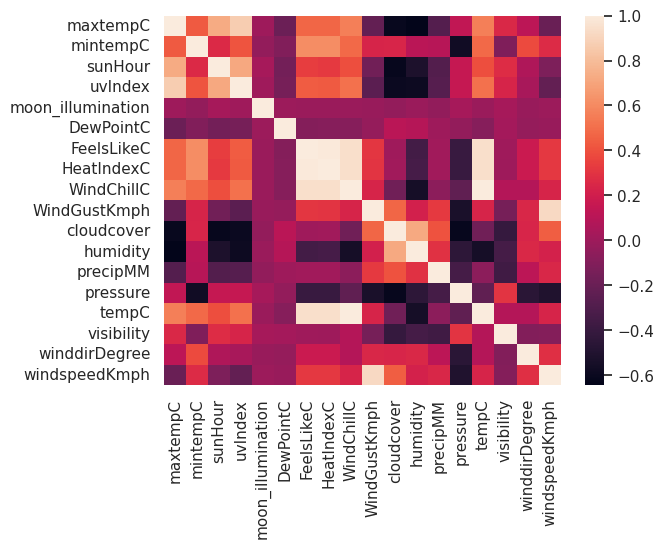

In [11]:
sns.heatmap(filled_df.corr())

In [12]:
filled_df.isna().sum()

maxtempC             0
mintempC             0
sunHour              0
uvIndex              0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

### Splitting Data into X and Y 

In [13]:
X= filled_df.drop(['tempC','moon_illumination','DewPointC','cloudcover','precipMM','visibility','winddirDegree','sunHour','WindChillC','WindGustKmph','windspeedKmph','FeelsLikeC'],axis=1)
Y= filled_df['tempC']

### Splitting X and Y into train and test datasets

In [14]:
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=12345)

## MODEL BUILDING

### - Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
import pickle
model = LinearRegression()
model.fit(x_train, y_train)
def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

save_model(model,'lg.pkl')

## MODEL EVALUATION

### Evaluating y_true and y_pred

In [16]:
y_true = y_test
y_pred = model.predict(x_test)

### - Mean Absolute Error (MAE)

In [17]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae

0.7352070758424476

### - Mean Squared Error (MSE)

In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

0.9249420456695954

### - R2 Score

In [19]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2


0.954882281914995

## PREDICTION

In [20]:
input_data = np.array([[31,17,11,18,63,1014]]) 
#normalized_input_data = normalize_function(input_data)
prediction = model.predict(input_data)
prediction.round()

/home/acer/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.])

In [21]:
y_pred

array([15.12417853, 22.68105517, 26.90448031, ..., 30.85391257,
       26.45930977, 22.65081024])

In [22]:
y_test

26638    17
22220    23
35649    27
37533    29
32702    27
         ..
12709    30
12524    27
15421    31
44125    25
23704    23
Name: tempC, Length: 9101, dtype: int64

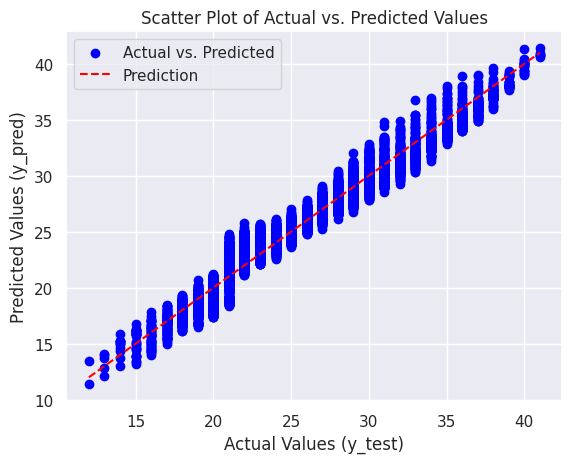

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test and y_pred from your weather prediction model
# Replace these with your actual data


# Create a scatter plot
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Prediction')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()